

# Bagaimana Membuat CNN untuk Image Classifier


Di dalam tutorial, kamu akan membuat sebuah Convolutional Neural Network (CNN atau ConvNets untuk melakukan image classification abdomen dan head. KIta akan menggunakan Framework Deep Learning TensorFlow untuk membuat neural network dan training/validation dataset. Pertama, silahkan download training and validation data.


### Building the Image Dataset

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# !ls

In [3]:
import os 

In [4]:
# Directory with our training abdomen pictures
train_abdomen_dir = os.path.join('D:/NGAJAR/GENAP 2022-2023/Teknik Biomedik/PPT/klasifikasi/data/binary/train/abdomen')

# Directory with our training head pictures
train_head_dir = os.path.join('D:/NGAJAR/GENAP 2022-2023/Teknik Biomedik/PPT/klasifikasi/data/binary/train/head')

# Directory with our validation abdomen pictures
valid_abdomen_dir = os.path.join('D:/NGAJAR/GENAP 2022-2023/Teknik Biomedik/PPT/klasifikasi/data/binary/val/abdomen')

# Directory with our validation head pictures
valid_head_dir = os.path.join('D:/NGAJAR/GENAP 2022-2023/Teknik Biomedik/PPT/klasifikasi/data/binary/val/head')

Melihat seperti apa nama file di training directory `abdomen` dan `head` :

In [5]:
train_abdomen_names = os.listdir(train_abdomen_dir)
print(train_abdomen_names[:10])

train_head_names = os.listdir(train_head_dir)
print(train_head_names[:10])

validation_abdomen_hames = os.listdir(valid_abdomen_dir)
print(validation_abdomen_hames[:10])

validation_head_names = os.listdir(valid_head_dir)
print(validation_head_names[:10])

['Patient00305_Plane2_1_of_2.jpg', 'Patient00305_Plane2_2_of_2.jpg', 'Patient00640_Plane2_1_of_1.jpg', 'Patient00649_Plane2_1_of_1.jpg', 'Patient00693_Plane2_1_of_1.jpg', 'Patient00701_Plane2_1_of_1.jpg', 'Patient00704_Plane2_1_of_1.jpg', 'Patient00707_Plane2_2_of_2.jpg', 'Patient00713_Plane2_1_of_1.jpg', 'Patient00716_Plane2_1_of_1.jpg']
['021_HC.jpg', '022_2HC.jpg', '022_HC.jpg', '023_HC.jpg', '024_HC.jpg', '025_HC.jpg', '026_2HC.jpg', '026_HC.jpg', '027_HC.jpg', '028_HC.jpg']
['Patient01675_Plane2_1_of_1.jpg', 'Patient01689_Plane2_1_of_1.jpg', 'Patient01763_Plane2_1_of_1.jpg', 'Patient01786_Plane2_1_of_1.jpg', 'Patient01789_Plane2_2_of_2.jpg']
['017_2HC.jpg', '017_HC.jpg', '018_HC.jpg', '019_2HC.jpg', '019_HC.jpg', '020_HC.jpg']


Mencari informasi berapa total images dari abdomen dan head di directory :

In [6]:
print('total training abdomen images:', len(os.listdir(train_abdomen_dir)))
print('total training head images:', len(os.listdir(train_head_dir)))
print('total validation abdomen images:', len(os.listdir(valid_abdomen_dir)))
print('total validation head images:', len(os.listdir(valid_head_dir)))

total training abdomen images: 89
total training head images: 89
total validation abdomen images: 5
total validation head images: 6


Melihat beberapa pictures untuk mendapatkan sense lebih baik Seperti apa. 
Hal pertama yang dilakukan adalah melakukan konfigurasi matplot parameters:

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Menampilkan 8 batch dari 8 abdomen and 8 head pictures. Kamu bisa melakukan rerun cell kembali untuk melihat fresh batch setiap waktu:

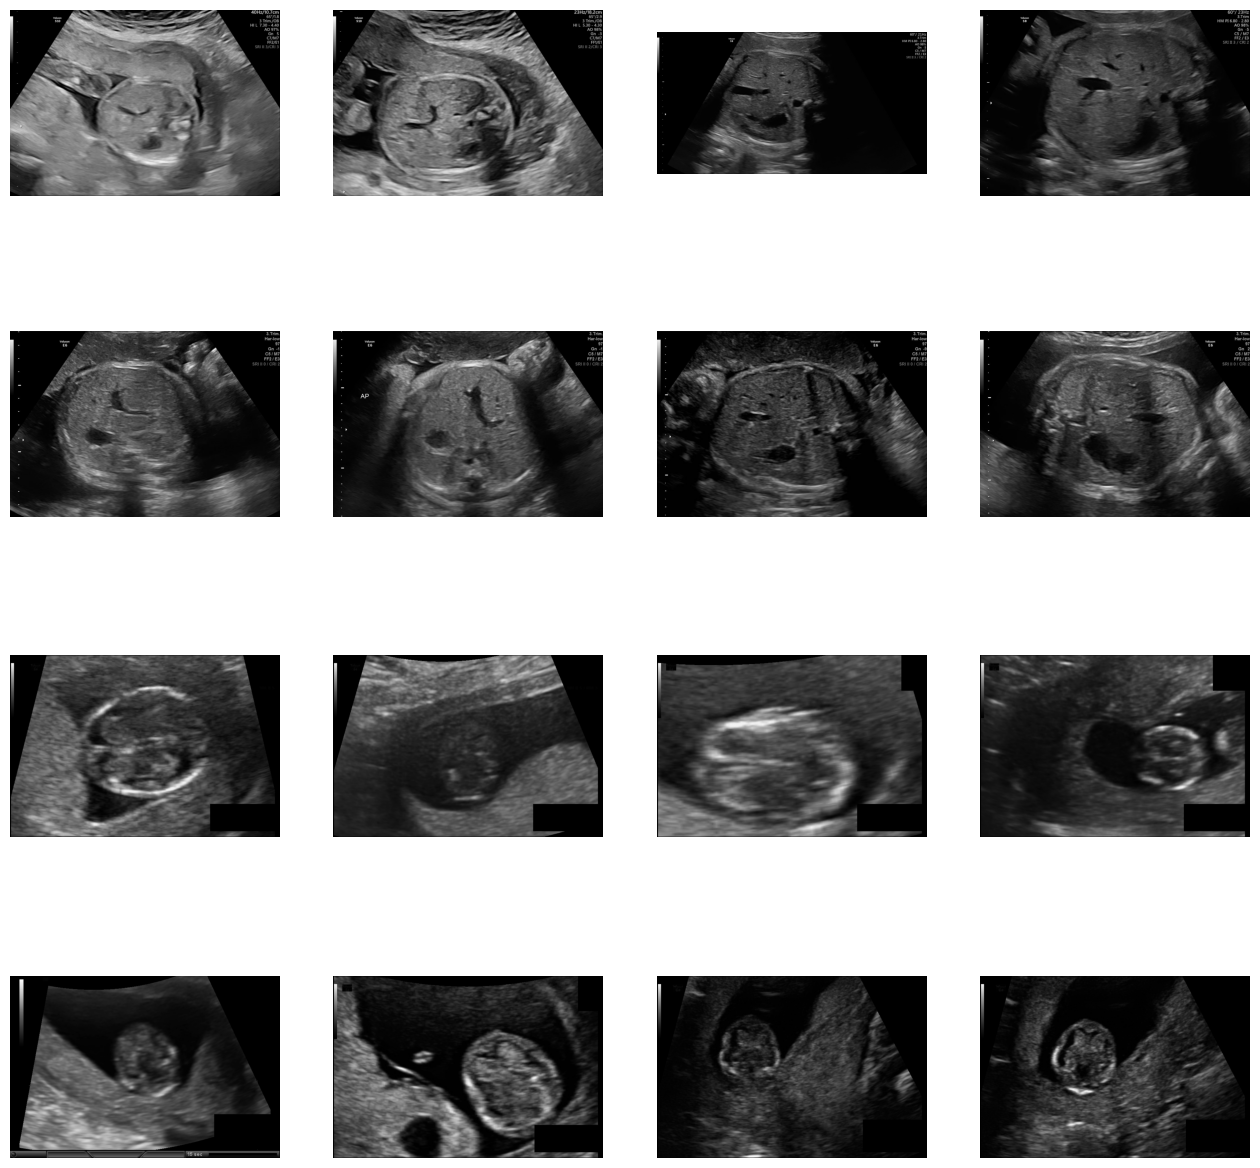

In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_abdomen_pic = [os.path.join(train_abdomen_dir, fname) 
                for fname in train_abdomen_names[pic_index-8:pic_index]]
next_head_pic = [os.path.join(train_head_dir, fname) 
                for fname in train_head_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_abdomen_pic + next_head_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


#### Data Preprocessing

Menggunakan `keras.preprocessing.image.ImageDataGenerator` class untuk membuat  train and validation dataset dan normalize data. 
Sangat penting untuk melakukan normalize data karena data akan diproses oleh CNN untuk improve performance secara keseluruhan. Disini kita akan menggunakan `rescale` parameter untuk scale our image pixel values dari [0, 255] ke [0,1].

Disetiap generator, kita menentukan source directory dari images, classes, input image size, batch size (seberapa banyak images yang akan diproses), dan class mode.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'D:/NGAJAR/GENAP 2022-2023/Teknik Biomedik/PPT/klasifikasi/data/binary/train/',  # This is the source directory for training images
        classes = ['abdomen', 'head'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'D:/NGAJAR/GENAP 2022-2023/Teknik Biomedik/PPT/klasifikasi/data/binary/val/',  # This is the source directory for training images
        classes = ['abdomen', 'head'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 178 images belonging to 2 classes.
Found 11 images belonging to 2 classes.



## Building the Model from Scratch

Memulai menentukan model:

Step 1 import tensorflow.

In [10]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

Menambahkan Flatten layer yang akan mem-flatten input image, dimana akan dilanjutkan ke next layer, Dense layer, atau fully-connected layer, dengan 128 hidden units. 
Pada tujuan akhirnya adalah untuk  melakukan binary classification, final layer akan menggunakan sigmoid, jadi output dari neural network akan menjadi single scalar antara 0 and 1, dengan melakukan encoding  probability pada image saat ini dengan class 
(class 1 menjadi rumput dan class 0 menjadi dandelion).

In [11]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, ZeroPadding2D, Flatten
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

# Conv Layer pertama
model.add(Conv2D(255, (3,3), activation = 'relu', input_shape=(200,200, 3)))
model.add(MaxPooling2D(2,2))

# Conv Layer kedua
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer ketiga
model.add(Conv2D(72, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer keempat
model.add(Conv2D(36, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Conv Layer kelima
model.add(Conv2D(16, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

# Flatten
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 255)     7140      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 255)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 128)       293888    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 72)        83016     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 72)       0

In [13]:
from tensorflow.keras import optimizers

Kolom "output shape"  menampilkan transformasi dari setiap dimensi layer sebagai hasil dari convolution and max pooling - convolution akan mengurangi layer size sedikit karena proses padding, dan max pooling membagi 2 output size.

Konfugirasi specifications untuk model training. Kita akan melakukan train model dengan `binary_crossentropy` loss. Kemudian menggunakan `Adam` optimizer. [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) adalah sensible optimization algorithm karena mengautomasi learning-rate tuning untuk kita (alternatifnya, kita bisa menggunakan [RMSProp](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) atau [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad) untuk hasil yang serupa). Kita akan menambahkan accuracy ke `metrics` jadi model akan memonitor accuracy saat melakukan training

In [14]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

### Training
Lakukan training dengan 15 epochs.

Perhatikan steps_per_epoch ditetapkan bersamaan dengan batch_size di ImageDataGenerator jadi steps_per_epoch * batch_size = total # of images.
Sebagai contohnya, untuk training, 8 * 120 = 960, dengan total 999 images.

Perhatikan saat kita melakukan training, validation accuracy tidak pernah melebihi training accuracy, dimana ini adalah sesuatu yang baik. Model tidak akan bekerja lebih baik pada data images yang belum terlihat dibandingkan images yang telah terlihat.

In [15]:
history = model.fit(train_generator,
      steps_per_epoch=5,  
      epochs=5,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/5
5/5 [==============================] - 94s 5s/step - loss: 0.6920 - accuracy: 0.5000 - val_loss: 0.6821 - val_accuracy: 0.7273


## Accuracy, ROC Curve, and AUC

Evaluasi accuracy model:

In [16]:
model.evaluate(validation_generator)

1/1 [==============================] - 1s 760ms/step - loss: 0.6821 - accuracy: 0.7273


[0.6821227073669434, 0.7272727489471436]

Kalkulasi ROC curve dan lakukan plotting.

Lakukan prediction di validation set. Ketika menggunakan generators untuk membuat predictions, Kita matikan shuffle (seperti yang kita lakukan ketika kita membuat validation_generator) dan reset the generator:

In [17]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

1/1 [==============================] - 1s 847ms/step


Untuk membuat ROC curve dan AUC, kita harus menghitung false-positive rate dan  true-positive rate:

In [18]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [19]:
roc_auc = auc(fpr, tpr)

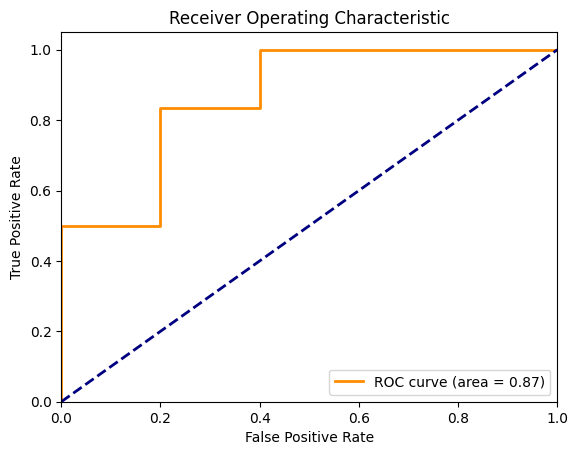

In [20]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [21]:
model.save('model_2.h5')

ROC curve probabilitas yang memplot tingkat true-positive rate (TPR) terhadap false-positive rate (FPR). didalam kurva ini, garis diagonal adalah kurva untuk random guessing, seperti coin flipping, jadi ROC curve di atas menunjukkan bahwa model lebih baik daripada kemungkinan melakukan classifying diantara dandelions dan rumput. GOOD!

Demikian pula, AUC (area di bawah kurva), seperti yang ditunjukkan pada legend di atas, mengukur seberapa banyak model untuk mampu membedakan antara dua kelas, dandelion dan rumput. Semakin tinggi AUC, semakin baik model kami dalam klasifikasi.

## Making Predictions
Menggunakan model untuk melakukan predictions! Upload sebuah gambar untuk melihat apakah ini adalah abdomen atau head.

In [23]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np
# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(200, 200))
#   x = image.img_to_array(img)
#   plt.imshow(x/255.)
#   x = np.expand_dims(x, axis=0)
#   images = np.vstack([x])
#   classes = model.predict(x)
#   print(np.argmax(classes))
#   if classes[0]<0.5:
#     print(fn + " ini adalah abdomen")
#   else:
#     print(fn + " ini adalah head")
 

## Clean Up
Run the following cell to terminate the kernel and free memory resources:

In [ ]:
# import os, signal
# os.kill(os.getpid(), signal.SIGKILL)